In [ ]:
import numpy as np

In [ ]:
#generate the first cluster
mean=[1,0]
cov_matrix=[[0.2, 0],[0, 0.3]]
n_samples=500

data1=np.random.multivariate_normal(mean,cov_matrix,n_samples)
x1=data1[:,0]
y1=data1[:,1]

In [ ]:
#generate the second cluster
mean=[2,0]
cov_matrix=[[0.2, 0],[0, 0.3]]
n_samples=500

data2=np.random.multivariate_normal(mean,cov_matrix,n_samples)
x2=data2[:,0]
y2=data2[:,1]

In [ ]:
#generate the third cluster
mean=[3,0]
cov_matrix=[[0.2, 0],[0, 0.3]]
n_samples=500

data3=np.random.multivariate_normal(mean,cov_matrix,n_samples)
x3=data3[:,0]
y3=data3[:,1]

In [ ]:
x=np.concatenate((x1, x2, x3))
y=np.concatenate((y1,y2, y3))
points=np.concatenate((data1, data2, data3))

Text(0.5, 1.0, 'Data to be clustered by Kmeans')

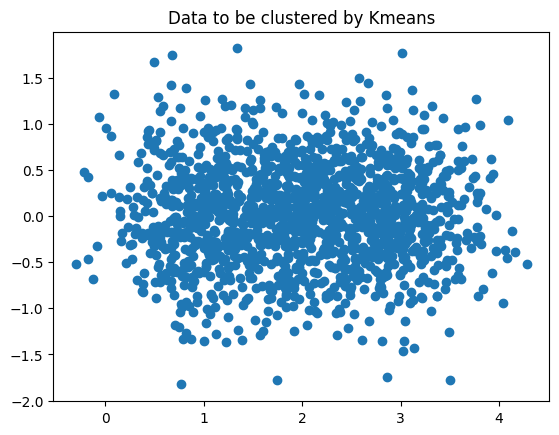

In [ ]:
import matplotlib.pyplot as plt

ax=plt.figure

plt.scatter(x,y)
plt.title("Data to be clustered by Kmeans")

In [ ]:
#define initial centroids
#you can define them randomly or start from a raw visual guess

cluster_amount=3
centroids=np.zeros((cluster_amount,2))

for i in range(cluster_amount):
  sorted=np.random.randint(x.shape[0])
  centroids[i]=np.array((x[sorted], y[sorted]))


#generating one hot encoders

one_hot_encoders = np.zeros((cluster_amount,cluster_amount))
for i in range(cluster_amount):
  hot_encoder=np.zeros(cluster_amount)
  hot_encoder[i]=1
  one_hot_encoders[i]=hot_encoder

n_int=4
for x in range(n_int):
  euc_distances=np.zeros((points.shape[0], cluster_amount))
  for p in range(points.shape[0]):
    for i in range(centroids.shape[0]):
      euc_distances[p][i]=np.linalg.norm(np.array(points[p]-centroids[i]))

  max_values = np.amax(euc_distances, axis=1)
  max_indices = np.argmax(euc_distances, axis=1)

  cluster_dict={}

  i=0
  for point, index in zip(points, max_indices):
    #new record for every iteration
    cluster_dict[f"point_{i}"] = {
        "coordinates":point,
        "cluster":one_hot_encoders[index]
    }
    i=i+1

  pontuation=np.zeros(cluster_amount)
  centroids=np.zeros((cluster_amount,2))
  for i in range(one_hot_encoders.shape[0]):
    target_cluster=one_hot_encoders[i]
    counter=0
    for record in cluster_dict.values():
      if np.array_equal(record["cluster"],target_cluster):
        centroids[i] += record['coordinates']
        counter=counter+1
    pontuation[i]=counter

  centroids=np.array((centroids.T/pontuation).T)

In [ ]:
centroids

array([[ 1.14976811, -0.07951575],
       [ 2.40073943,  0.55399314],
       [ 2.88092331, -0.29183204]])

In [ ]:
pontuation

array([674., 363., 463.])

In [ ]:
#K-means generally works poorly, it relies on euclidean distance to form circular clusters, but that's not always the case.
#bad initialization (random) can lead it to wrong results. This is a bigger downsize for K-means in the case of high-dimensional data
#when visualization becames more complicated.
#Depending on the initialization or the data generated to be clustered, this algorithm does not work, speccially when the generating souce produces clusters
#that are considerably distant from the others.


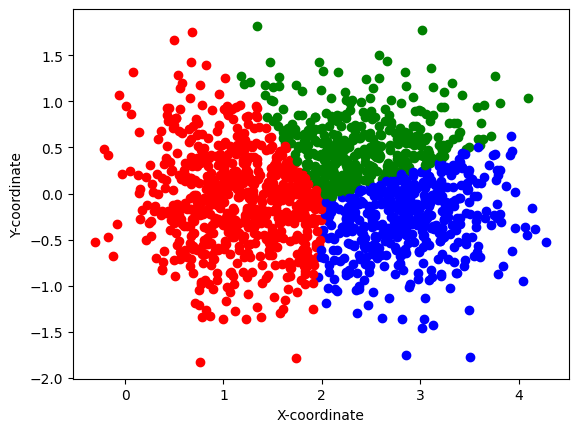

In [ ]:
# Extract coordinates and cluster data
data=cluster_dict
coordinates = [point['coordinates'] for point in data.values()]
clusters = [point['cluster'] for point in data.values()]

# Create a scatter plot with different colors for different clusters
colors = ['r', 'g', 'b']  # Red, green, and blue for clusters
for i, cluster in enumerate(clusters):
    plt.scatter(coordinates[i][0], coordinates[i][1], c=colors[np.argmax(cluster)], label=f'point_{i}')

# Add labels and legend
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Show the plot
plt.show()